# Decision Tree Classifier

In [1]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.tree import export_text

In [2]:
train = pd.read_csv('train_data_z.csv')
test = pd.read_csv('test_data_z.csv')
train_target = pd.read_csv('train_target.csv')
test_target = pd.read_csv('test_target.csv')

In [3]:
test = test.drop(columns=['Unnamed: 0'])
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,1.169260,-0.387546,-0.385878,-0.385693,-0.376426,-0.387546,-0.326386,-0.386249,-0.109545,-0.376426,-0.374573,3.452576,-0.352332,-0.385693,-0.387546
1,3.124485,-0.439235,-0.429522,-0.435886,-0.435886,-0.435886,-0.325357,-0.438565,0.177047,-0.419139,-0.395693,1.751247,-0.419139,-0.439235,-0.439235
2,0.894237,-0.354732,-0.353609,-0.354732,-0.347589,-0.355752,-0.342487,-0.355242,-0.237386,-0.351670,-0.343507,3.558500,-0.344528,-0.355752,-0.355752
3,3.274871,-0.430102,-0.431795,-0.433489,-0.419942,-0.433489,-0.281090,-0.431795,0.233677,-0.430102,-0.416555,1.463024,-0.399622,-0.430102,-0.433489
4,2.044517,-0.430668,-0.431485,-0.430668,-0.414312,-0.433393,-0.305273,-0.433121,-0.035401,-0.425216,-0.408860,2.957718,-0.389778,-0.430668,-0.433393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.670650,-0.351342,-0.352171,-0.351342,-0.349686,-0.351342,-0.258585,-0.352667,-0.207236,-0.348030,-0.341404,3.620680,-0.324840,-0.351342,-0.351342
396,1.417180,-0.408184,-0.404450,-0.405988,-0.392808,-0.405988,-0.351073,-0.406647,-0.019389,-0.397202,-0.384022,3.334800,-0.364253,-0.405988,-0.405988
397,2.336974,-0.409827,-0.410263,-0.411279,-0.404017,-0.411279,-0.343009,-0.410698,-0.251497,-0.405469,-0.396754,2.743693,-0.406922,-0.409827,-0.409827
398,1.975063,-0.404009,-0.400199,-0.404009,-0.404009,-0.404009,-0.360657,-0.403746,-0.230603,-0.393499,-0.401381,3.024692,-0.386931,-0.402695,-0.404009


In [4]:
train = train.drop(columns=['Unnamed: 0'])
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi
0,3.518773,-0.389060,-0.390599,-0.392137,-0.355213,-0.392137,-0.293672,-0.391829,-0.044432,-0.370598,-0.345982,0.977143,-0.349059,-0.392137,-0.389060
1,3.478740,-0.374512,-0.373483,-0.372454,-0.368337,-0.374512,-0.339520,-0.373071,-0.191318,-0.362162,-0.362162,1.115741,-0.355987,-0.374512,-0.372454
2,0.238224,-0.323850,-0.322328,-0.322763,-0.320589,-0.322763,-0.287973,-0.322980,-0.124896,-0.319501,-0.315153,3.703076,-0.311891,-0.323850,-0.322763
3,0.724021,-0.358123,-0.357073,-0.358123,-0.344115,-0.358123,-0.330107,-0.357773,-0.107724,-0.356372,-0.333609,3.602736,-0.351119,-0.356372,-0.358123
4,2.483225,-0.420429,-0.420769,-0.422129,-0.408529,-0.420429,-0.323527,-0.420769,-0.190925,-0.418729,-0.405129,2.605627,-0.393229,-0.422129,-0.422129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.007380,-0.368659,-0.366474,-0.368659,-0.358951,-0.369872,-0.317694,-0.369387,-0.178149,-0.368659,-0.356524,3.517982,-0.362591,-0.369872,-0.369872
1596,2.025564,-0.412625,-0.410175,-0.410992,-0.391395,-0.412625,-0.326072,-0.411808,-0.246051,-0.404460,-0.386496,2.989081,-0.379963,-0.410992,-0.410992
1597,1.811740,-0.406298,-0.400533,-0.403791,-0.406298,-0.403791,-0.368704,-0.405295,-0.148153,-0.388754,-0.406298,3.127525,-0.393766,-0.403791,-0.403791
1598,1.604449,-0.418832,-0.409670,-0.418832,-0.415014,-0.418832,-0.296671,-0.417687,-0.082891,-0.395927,-0.342482,3.242161,-0.395927,-0.415014,-0.418832


In [5]:
train_target = train_target.drop(columns=['Unnamed: 0'])
train_target

,price_range
0,0
1,1
2,3
3,2
4,2
...,...
1595,3
1596,2
1597,0
1598,0


In [6]:
test_target = test_target.drop(columns=['Unnamed: 0'])
train_target

,price_range
0,0
1,1
2,3
3,2
4,2
...,...
1595,3
1596,2
1597,0
1598,0


In [7]:
train_names = list(train.columns)


In [8]:
trainNP = train.to_numpy()
testNP = test.to_numpy()
train_targetNP = train_target.to_numpy()
test_targetNP = test_target.to_numpy()

In [9]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [10]:
treeclf = treeclf.fit(trainNP, train_targetNP)

In [11]:
treepreds_test = treeclf.predict(testNP)
print (treepreds_test)

[1 0 2 0 0 1 3 0 2 1 3 3 1 3 2 1 0 2 1 3 1 0 1 3 3 3 0 2 0 2 1 3 3 0 3 1 1
 1 3 0 0 3 1 1 0 0 1 2 3 2 0 2 0 2 2 2 1 1 2 1 3 2 0 1 1 3 3 1 2 2 1 3 0 0
 1 3 2 2 0 1 2 0 2 2 3 2 1 2 3 1 2 3 0 3 3 1 3 1 2 1 1 0 1 0 1 1 3 0 2 3 3
 1 1 1 1 0 1 2 1 3 2 1 0 1 1 2 1 3 0 0 3 2 3 2 3 1 2 3 1 2 0 2 0 1 1 0 1 1
 3 1 1 2 1 1 0 3 0 2 3 1 2 0 1 0 2 0 3 0 2 3 0 3 2 2 0 3 2 2 1 2 2 0 0 2 2
 3 3 2 2 2 3 2 2 2 2 1 1 2 2 2 3 0 3 0 0 0 0 1 0 2 3 3 1 3 1 2 2 0 0 1 3 3
 2 1 1 1 1 0 3 1 3 2 3 0 2 0 0 0 0 3 1 3 3 1 0 1 1 1 0 0 1 2 0 1 1 0 3 3 1
 3 2 3 3 0 3 2 2 2 0 0 1 0 0 1 2 1 1 2 1 2 0 0 1 1 0 1 3 2 0 0 1 0 0 0 2 2
 1 2 1 1 0 2 2 1 2 1 3 3 3 3 2 2 2 1 3 0 2 2 2 2 3 0 3 2 0 0 1 1 0 0 2 2 0
 3 3 3 3 3 1 3 3 1 0 3 0 3 1 3 3 0 3 0 3 0 3 3 0 3 1 3 0 2 2 1 2 3 0 3 3 0
 2 2 1 3 2 2 3 3 3 3 2 2 1 2 0 2 1 3 2 0 0 2 3 3 3 1 0 2 2 0]


In [12]:
print (treeclf.score(testNP, test_targetNP))

0.5925


In [13]:
print (treeclf.score(trainNP, train_targetNP))

0.991875


In [14]:
print(classification_report(test_targetNP, treepreds_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        94
           1       0.52      0.50      0.51       106
           2       0.41      0.45      0.43        93
           3       0.69      0.64      0.67       107

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400



In [15]:
treecm = confusion_matrix(test_targetNP, treepreds_test, labels=[0,1,2,3])
print (treecm)

[[73 18  3  0]
 [18 53 25 10]
 [ 4 26 42 21]
 [ 0  5 33 69]]


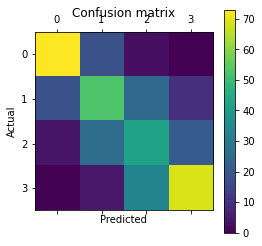

In [16]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Initally, overfitting appears to be an issue due to a very high score on the training set and a much lower score on the testing set. To combat the overfitting, I am going to perform some post-pruning to determine the best cost complexity parameter (ccp_alpha) value to use. 

### The cost complexity pruning path from sklearn identifies which nodes can or should be left off the decision tree by providing alpha values that correspond to which nodes are pruned and the corresponding impurity level associated with each step. In the process below, I attempt to find the best alpha value, which will prune meaningless nodes, help deter the overfitting that I saw above, while maintaining a low impurity level for my leaves

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(trainNP, train_targetNP)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#### In the plot below, the effective alpha levels and their corresponding total impurity levels are graphed, leaving off the top alpha value, because that would correspond with only 1 node, which would not provide much meaning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

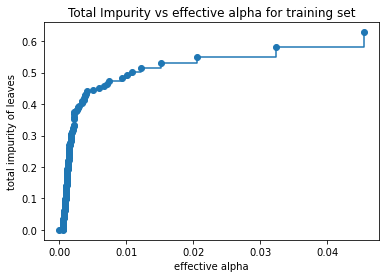

In [18]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#### Below we are examing the impact different alpha values have, while identifying the alpha value that would prune the entire tree less one node. We can see that when an alpha value of 0.1215.. is selected, we will have a decision tree with a single node, which is not ideal.

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(trainNP, train_targetNP)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12157281190745839


#### The next two plots examine the tree depth and corresponding alpha levels, the top alpha level has been left off, as it correponds to the trivial one node tree. 

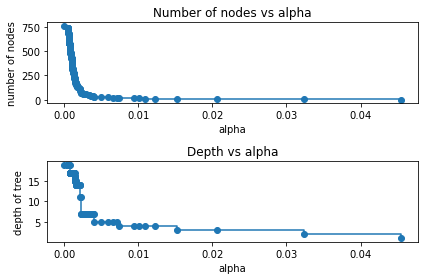

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Below the accuracy level of the training and testing sets and corresponding alpha levels is compared. As seen in the initial decision tree above, there is overfitting when alpha is zero, which can be seen by the differences in accuracy in the training and testing set when alpha = 0. The accuracy levels of training and testing come together around the alpha value of 0.01, so I will rerun the decision tree classifier with an alpha value of 0.01.

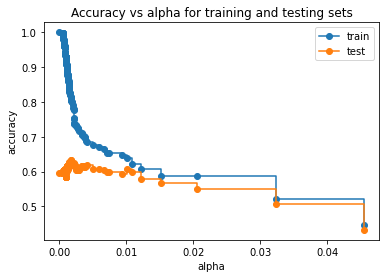

In [21]:
train_scores = [clf.score(trainNP, train_targetNP) for clf in clfs]
test_scores = [clf.score(testNP, test_targetNP) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Decision Tree Classifier 
### When ccp_alpha = 0.01

In [22]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3, ccp_alpha = 0.01)

In [23]:
treeclf = treeclf.fit(trainNP, train_targetNP)

In [24]:
treepreds_test = treeclf.predict(testNP)
print (treepreds_test)

[1 0 3 0 0 1 3 1 2 3 3 3 1 2 1 3 0 2 2 3 2 0 1 3 3 3 0 1 0 3 3 3 3 0 3 2 1
 1 3 0 0 2 1 1 0 0 1 2 3 2 0 1 0 2 2 2 1 1 2 1 3 3 0 1 2 3 3 1 2 2 0 3 0 0
 1 3 3 2 0 2 2 0 2 2 3 3 0 3 3 2 2 3 0 3 3 1 3 1 3 2 1 0 1 1 2 2 3 0 1 3 3
 1 1 2 1 0 1 2 1 3 3 2 0 3 2 2 0 3 0 1 3 2 3 3 2 3 2 3 2 2 0 3 0 2 0 0 0 1
 2 1 1 2 0 1 0 3 0 2 2 2 3 0 0 0 2 0 3 0 2 3 0 3 3 3 1 3 2 0 1 2 2 0 0 2 1
 3 3 3 2 2 2 2 2 3 2 1 1 3 1 3 3 1 3 0 0 2 0 0 0 3 2 2 0 3 0 2 2 1 0 1 3 3
 3 0 2 2 0 0 3 0 3 2 3 0 2 0 1 0 0 3 1 2 2 1 0 1 0 1 0 0 1 2 0 2 0 1 2 3 2
 2 2 3 2 1 2 0 2 3 0 0 1 1 0 2 2 2 1 3 1 2 0 0 1 2 0 0 3 2 0 0 2 0 0 0 1 2
 3 3 1 1 0 3 2 1 2 0 3 3 3 3 3 2 2 0 3 0 1 3 2 2 3 1 3 2 1 0 1 0 0 0 3 2 0
 3 2 3 3 3 1 3 3 1 0 2 0 3 1 3 3 0 2 0 3 0 3 2 0 3 0 3 0 2 2 0 1 3 0 3 3 1
 3 3 2 3 3 2 3 3 3 3 0 2 2 1 0 1 2 3 2 0 0 2 3 3 2 3 0 2 2 0]


In [25]:
print (treeclf.score(testNP, test_targetNP))

0.625


In [26]:
print (treeclf.score(trainNP, train_targetNP))

0.67125


In [27]:
print(classification_report(test_targetNP, treepreds_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        94
           1       0.54      0.37      0.44       106
           2       0.45      0.52      0.48        93
           3       0.70      0.77      0.73       107

    accuracy                           0.62       400
   macro avg       0.62      0.63      0.62       400
weighted avg       0.62      0.62      0.62       400



In [28]:
treecm = confusion_matrix(test_targetNP, treepreds_test, labels=[0,1,2,3])
print (treecm)

[[81 12  1  0]
 [22 39 32 13]
 [ 2 21 48 22]
 [ 0  0 25 82]]


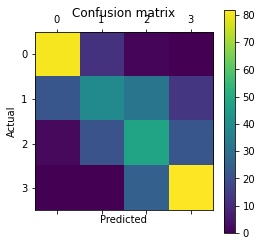

In [29]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### As can be seen above, the overfitting was addressed by setting a ccp_alpha to a value of 0.01. When the ccp_alpha was 0, overfitting was present as could be seen by an accuracy level of 0.99 on the training data and 0.60 on the testing data. With an alternative ccp_alpha value of 0.01 the training accuracy is 0.67 and testing accuracy level of 0.625. The testing accuracy is still lower than the training data, but it is better than the testing accuracy without an established ccp_alpha level. 

### Overall, an accuracy level of 0.625 is not ideal and we would like to see a higher level *need to add more here*

In [30]:
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_8 <= -0.09
|   |--- feature_11 <= 2.85
|   |   |--- feature_11 <= 2.06
|   |   |   |--- class: 0
|   |   |--- feature_11 >  2.06
|   |   |   |--- feature_3 <= -0.42
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.42
|   |   |   |   |--- feature_11 <= 2.54
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_11 >  2.54
|   |   |   |   |   |--- class: 2
|   |--- feature_11 >  2.85
|   |   |--- feature_8 <= -0.17
|   |   |   |--- feature_1 <= -0.40
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  -0.40
|   |   |   |   |--- feature_8 <= -0.23
|   |   |   |   |   |--- feature_3 <= -0.38
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  -0.38
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_8 >  -0.23
|   |   |   |   |   |--- class: 3
|   |   |--- feature_8 >  -0.17
|   |   |   |--- feature_14 <= -0.39
|   |   |   |   |--- feature_6 <= -0.33
|   |   |   |   |   |--- feature_12 <= -0.37
|   |   |   | 

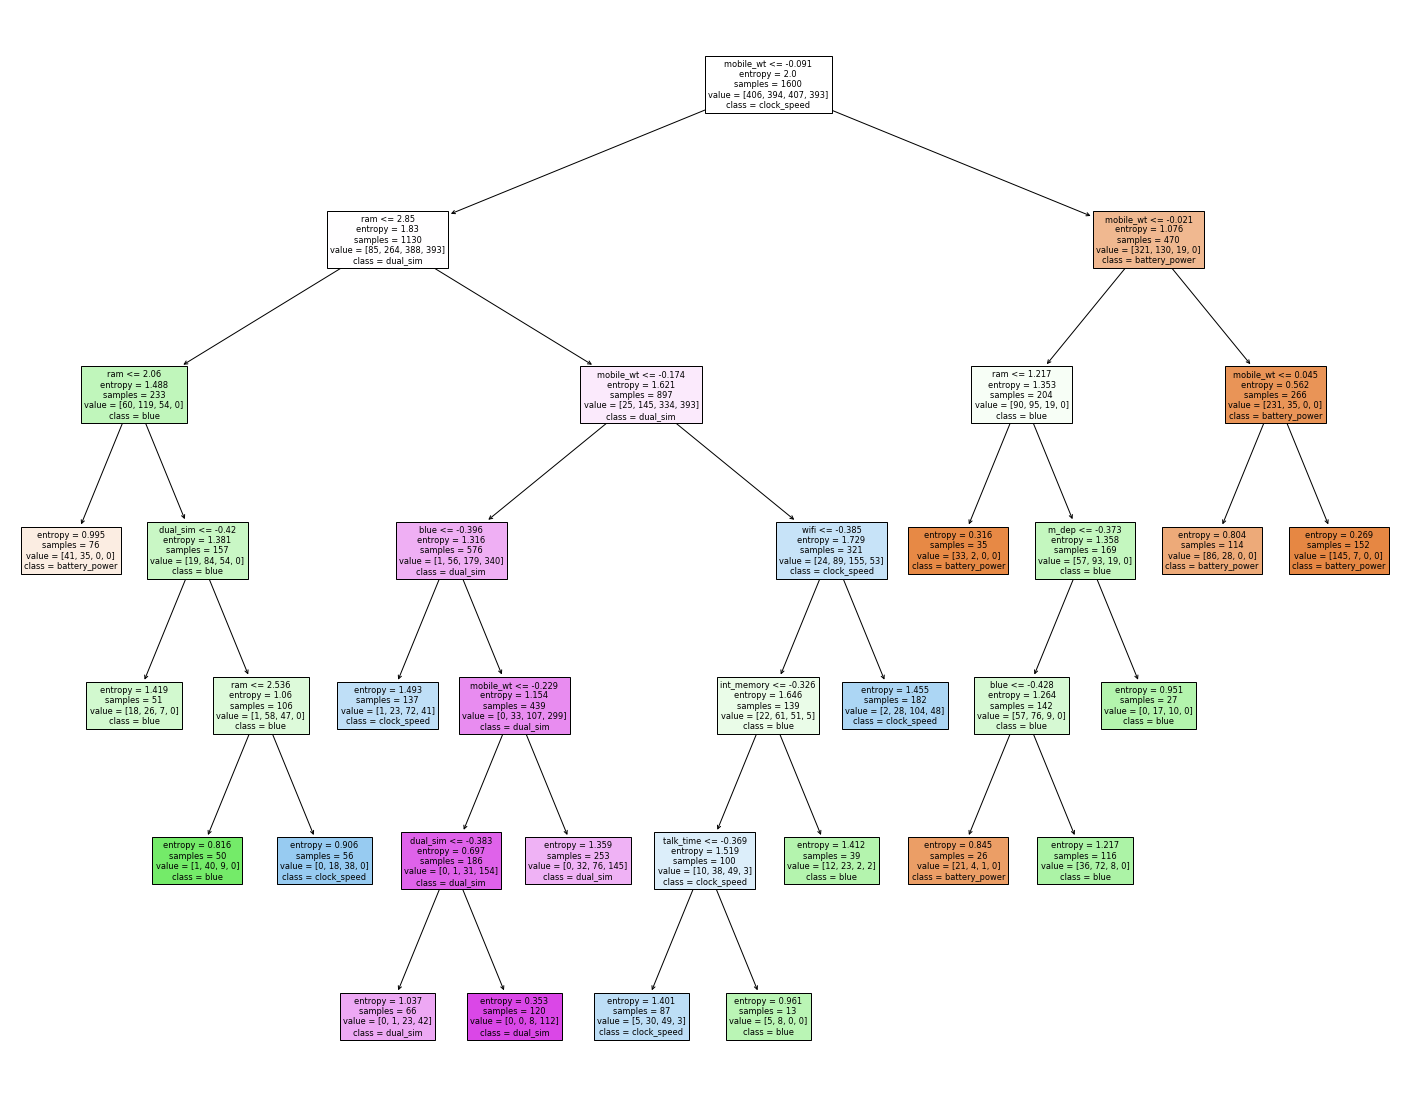

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeclf, 
                   feature_names=train_names,  
                   class_names=train_names,
                   filled=True)

See [ClusterProject](./ClusterProject.ipynb)